<a href="https://colab.research.google.com/github/olivia3110/JISEBI/blob/main/Simulation_for_paper_JISEBI_OOT2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

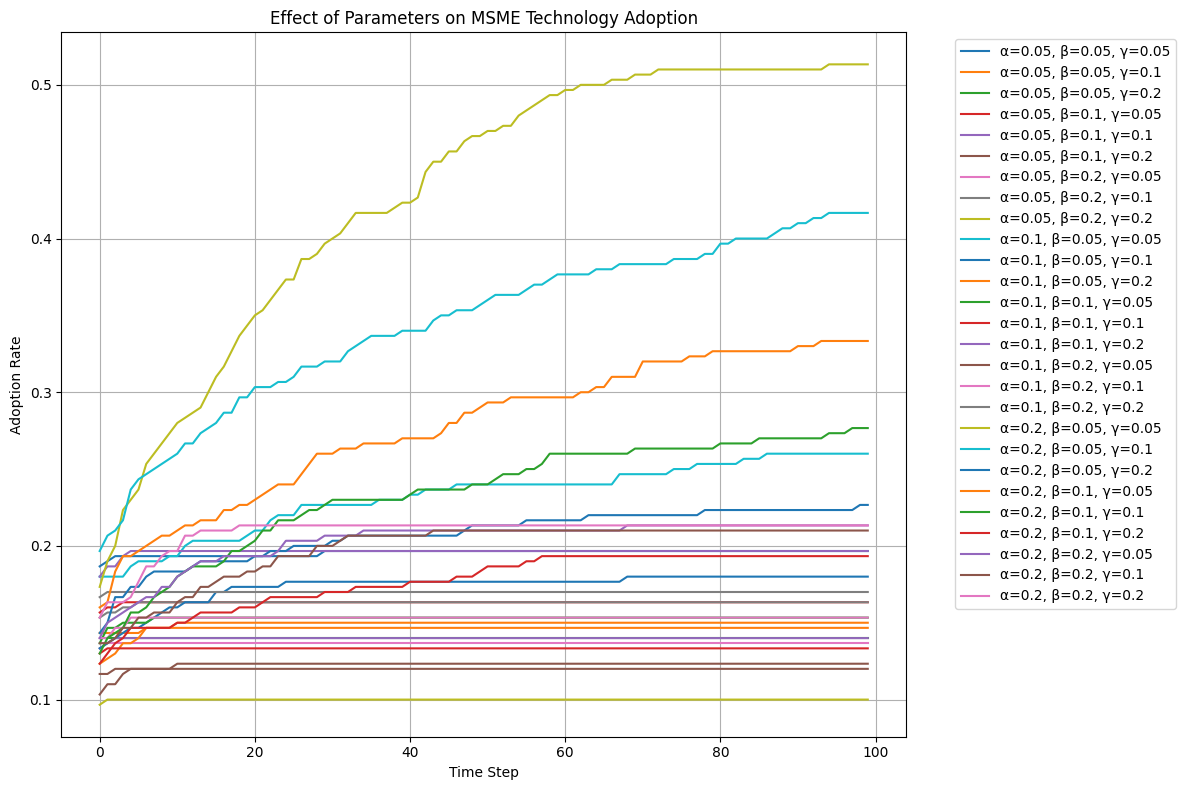

In [ ]:
# MSME ABM Simulation in Python (Google Colab Version)
# Revised to explore how different parameters influence technology adoption over time

import numpy as np
import random
import matplotlib.pyplot as plt

# Parameters
NUM_AGENTS = 300
RADIUS = 2
TIME_STEPS = 100
ALPHA = 0.1    # sensitivity to positive arguments
BETA = 0.1     # negative effect on benefit
GAMMA = 0.1    # increase in perceived risk due to negative arguments

# For sensitivity analysis
ALPHA_VALUES = [0.05, 0.1, 0.2]
BETA_VALUES = [0.05, 0.1, 0.2]
GAMMA_VALUES = [0.05, 0.1, 0.2]

class MSMEAgent:
    def __init__(self):
        self.adoption_status = 0
        self.perceived_benefit = random.uniform(0, 1)
        self.perceived_risk = random.uniform(0, 1)
        self.attitude = random.uniform(0, 1)
        self.decision_threshold = random.uniform(0.2, 0.8)
        self.agent_type = random.choice(["innovator", "early", "late", "laggard"])
        self.received_arguments = []
        self.position = np.random.rand(2) * 100
        self.peer_influence = 0.0

    def observe_peers(self, agents):
        neighbors = [a for a in agents if np.linalg.norm(self.position - a.position) <= RADIUS and a != self]
        if neighbors:
            self.peer_influence = sum(a.adoption_status for a in neighbors) / len(neighbors)
        else:
            self.peer_influence = 0.0

    def exchange_arguments(self, agents):
        neighbors = [a for a in agents if np.linalg.norm(self.position - a.position) <= RADIUS and a != self]
        if neighbors:
            partner = random.choice(neighbors)
            arg_type = random.choice(["pro", "con"])
            arg_strength = random.uniform(0, 1)
            self.received_arguments.append((arg_type, arg_strength))

    def update_perception(self, alpha, beta, gamma):
        for arg in self.received_arguments:
            if arg[0] == "pro":
                self.perceived_benefit += alpha * arg[1]
            elif arg[0] == "con":
                self.perceived_benefit -= beta * arg[1]
                self.perceived_risk += gamma * arg[1]
        self.received_arguments = []

    def make_decision(self):
        if self.adoption_status == 0:
            net_benefit = self.perceived_benefit - self.perceived_risk
            if net_benefit > self.decision_threshold:
                self.adoption_status = 1

# Simulation function

def run_simulation(alpha, beta, gamma):
    agents = [MSMEAgent() for _ in range(NUM_AGENTS)]
    adoption_rates = []
    for t in range(TIME_STEPS):
        for agent in agents:
            agent.observe_peers(agents)
        for agent in agents:
            agent.exchange_arguments(agents)
        for agent in agents:
            agent.update_perception(alpha, beta, gamma)
        for agent in agents:
            agent.make_decision()
        adoption_rate = sum(a.adoption_status for a in agents) / NUM_AGENTS
        adoption_rates.append(adoption_rate)
    return adoption_rates

# Run and compare different parameter combinations
results = {}
for alpha in ALPHA_VALUES:
    for beta in BETA_VALUES:
        for gamma in GAMMA_VALUES:
            label = f"α={alpha}, β={beta}, γ={gamma}"
            results[label] = run_simulation(alpha, beta, gamma)

# Plotting results
plt.figure(figsize=(12, 8))
for label, rates in results.items():
    plt.plot(rates, label=label)
plt.xlabel('Time Step')
plt.ylabel('Adoption Rate')
plt.title('Effect of Parameters on MSME Technology Adoption')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
# INSTALLATION (run once if needed)
!pip install ipywidgets --quiet

# ===========================
# MSME AGENT-BASED SIMULATION
# ===========================

import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Rectangle
from IPython.display import HTML, display
import ipywidgets as widgets
import pandas as pd

# MSME Agent Class
class MSMEAgent:
    def __init__(self, zone_width, initially_adopted):
        self.adoption_status = 1 if initially_adopted else 0
        self.perceived_benefit = random.uniform(0, 1)
        self.perceived_risk = random.uniform(0, 1)
        self.attitude = random.uniform(0, 1)
        self.decision_threshold = random.uniform(0.2, 0.8)
        self.agent_type = random.choice(["innovator", "early", "late", "laggard"])
        self.position = np.random.rand(2) * 100
        self.peer_influence = 0.0
        self.volatility = random.uniform(0.1, 0.5)
        self.resilience = random.uniform(0.1, 0.9)
        self.zone_width = zone_width

    def move(self):
        self.position += np.random.uniform(-2, 2, 2)
        self.position = np.clip(self.position, 0, 100)

    def get_zone_env_shock(self):
        if self.position[0] < self.zone_width:
            return -0.3
        elif self.position[0] > (100 - self.zone_width):
            return +0.3
        else:
            return random.uniform(-0.1, 0.1)

    def update_attitude(self, env_shock):
        influence = self.volatility * (1 - self.resilience) * env_shock
        self.attitude = min(max(self.attitude + influence, 0), 1)

    def decide(self, alpha, beta, gamma):
        net_benefit = self.perceived_benefit - self.perceived_risk + 0.2 * self.attitude
        if self.adoption_status == 0 and net_benefit > self.decision_threshold:
            self.adoption_status = 1
        elif self.adoption_status == 1 and net_benefit < self.decision_threshold * 0.7:
            self.adoption_status = 0

# WIDGET CONTROLS
alpha_slider = widgets.FloatSlider(value=0.1, min=0.01, max=0.5, step=0.01, description='Alpha (α)')
beta_slider = widgets.FloatSlider(value=0.1, min=0.01, max=0.5, step=0.01, description='Beta (β)')
gamma_slider = widgets.FloatSlider(value=0.1, min=0.01, max=0.5, step=0.01, description='Gamma (γ)')
num_agents_slider = widgets.IntSlider(value=100, min=20, max=500, step=10, description='Agents')
zone_width_slider = widgets.IntSlider(value=20, min=10, max=40, step=5, description='Zone Width')
initial_adoption_slider = widgets.IntSlider(value=20, min=0, max=100, step=5, description='% Adopted')
interval_dropdown = widgets.Dropdown(options=[1, 2, 5, 10], value=1, description='Summary Interval')
run_button = widgets.Button(description="Run Simulation")
output = widgets.Output()

# SIMULATION FUNCTION
def run_simulation(b):
    output.clear_output()
    with output:
        alpha = alpha_slider.value
        beta = beta_slider.value
        gamma = gamma_slider.value
        num_agents = num_agents_slider.value
        zone_width = zone_width_slider.value
        initial_adoption_percent = initial_adoption_slider.value
        output_interval = interval_dropdown.value

        steps = 50
        agents = []
        for i in range(num_agents):
            adopted = i < int(initial_adoption_percent / 100 * num_agents)
            agents.append(MSMEAgent(zone_width, adopted))
        snapshots = []
        adoption_over_time = []

        for t in range(steps):
            for agent in agents:
                agent.move()
                shock = agent.get_zone_env_shock()
                agent.update_attitude(shock)
                if random.random() < 0.5:
                    agent.perceived_benefit += alpha * random.uniform(0, 1)
                else:
                    agent.perceived_benefit -= beta * random.uniform(0, 1)
                    agent.perceived_risk += gamma * random.uniform(0, 1)
                agent.decide(alpha, beta, gamma)

            snapshot = [(a.position[0], a.position[1], a.adoption_status, a.attitude) for a in agents]
            snapshots.append(snapshot)
            adoption_over_time.append(sum([a.adoption_status for a in agents]) / num_agents)

        # Set up animation and chart
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
        ax1.set_xlim(0, 100)
        ax1.set_ylim(0, 100)
        ax2.set_xlim(2025, 2025 + steps)
        ax2.set_ylim(0, 1.05)

        ax1.add_patch(Rectangle((0, 0), zone_width, 100, color='lightcoral', alpha=0.2))
        ax1.add_patch(Rectangle((zone_width, 0), 100 - 2 * zone_width, 100, color='lightblue', alpha=0.2))
        ax1.add_patch(Rectangle((100 - zone_width, 0), zone_width, 100, color='lightgreen', alpha=0.2))

        text_objs = []
        line_adoption, = ax2.plot([], [], color='blue', marker='o')
        ax2.set_title("Technology Adoption Rate Over Time")
        ax2.set_xlabel("Year")
        ax2.set_ylabel("Adoption Rate")

        def update(frame):
            nonlocal text_objs
            for txt in text_objs:
                txt.remove()
            text_objs = []
            data = snapshots[frame]
            for x, y, adopted, attitude in data:
                color = 'green' if adopted == 1 else ('orange' if attitude > 0.6 else 'red')
                txt = ax1.text(x, y, '👤', fontsize=12, ha='center', va='center', color=color)
                text_objs.append(txt)
            ax1.set_title(f"Year {2025 + frame}")
            x = list(range(2025, 2025 + frame + 1))
            y = adoption_over_time[:frame + 1]
            line_adoption.set_data(x, y)
            return text_objs + [line_adoption]

        ani = animation.FuncAnimation(fig, update, frames=len(snapshots), interval=300, blit=False)
        plt.close()
        display(HTML(ani.to_jshtml()))

        # Summary Table
        summary = []
        for year in range(0, steps, output_interval):
            total = num_agents
            adopted = int(adoption_over_time[year] * total)
            not_adopted = total - adopted
            summary.append({
                "Year": 2025 + year,
                "Adopters": adopted,
                "Non-Adopters": not_adopted,
                "Adoption Rate": round(adoption_over_time[year], 2)
            })

        df_summary = pd.DataFrame(summary)
        display(df_summary)

# Connect button
run_button.on_click(run_simulation)

# Display interface
display(widgets.VBox([
    alpha_slider, beta_slider, gamma_slider,
    num_agents_slider, zone_width_slider, initial_adoption_slider,
    interval_dropdown,
    run_button, output
]))
